### IDs:
Insert yours IDs to the cell below

ID #1: 805859

ID #2: 204244255


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import optimize
from math import sqrt
from sklearn import mixture

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
print(boston_data.keys())
print(boston_data.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [3]:
#How many samples does it contain? How many features? What isis the data type for each variable?
data = boston_data.data
features = boston_data.feature_names
target = boston_data.target
print("There are", data.shape[0], "samples in the set")
#"median value" of owner occupied houses is another feature
print("There are", len(features) + 1, "features in the set")

There are 506 samples in the set
There are 14 features in the set


In [4]:
boston_pd = pd.DataFrame(data)
boston_pd.columns = features
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston_pd.insert(13, "MEDV", target, True)
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Text(0.5, 1.0, 'Nitric oxides concentration boxplot')

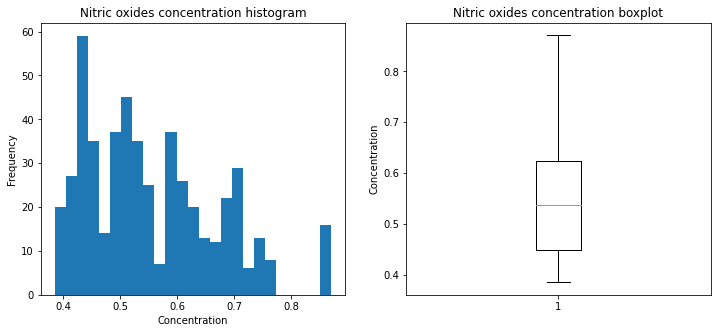

In [6]:
#Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].hist(boston_pd['NOX'],bins=25)
ax[0].set_xlabel("Concentration")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Nitric oxides concentration histogram")

ax[1].boxplot(boston_pd['NOX'])
ax[1].set_ylabel("Concentration")
ax[1].set_title("Nitric oxides concentration boxplot")


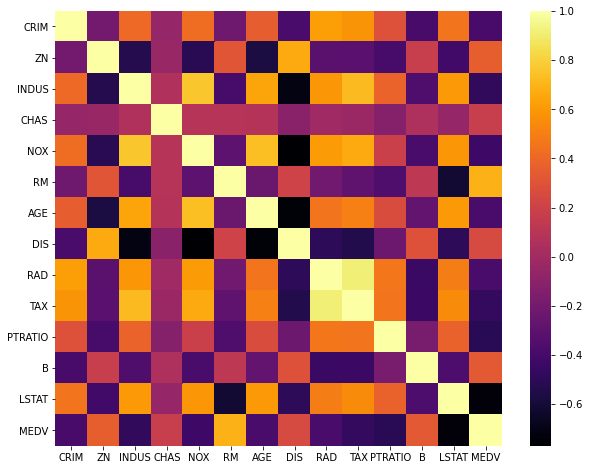

In [7]:
#Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
fig, ax = plt.subplots(1,1, figsize=(10,8))
correlation_matrix = boston_pd.corr()
sns.heatmap(correlation_matrix, cmap="inferno")
plt.show()

#TAX (full-value property-tax rate per $10,000) and RAD (index of accessibility to radial highways) are two highly correlated features
#DIS (weighted distances to five Boston employment centres) is mostly negatively correlated to all other features
#CHAS (Charles River dummy variable) seems to barely correlate to any other feature


Max correlation 0.9102281885331822
Min correlation -0.7692301132258261
Max correlation is between TAX and RAD features
Min correlation is between NOX and DIS features


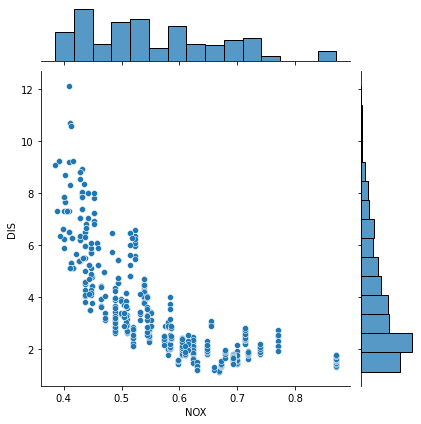

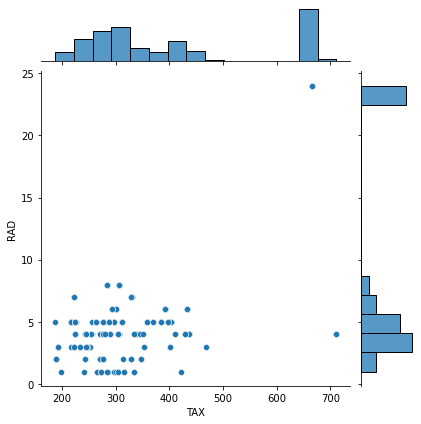

In [8]:
#Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot).
min_correlation = correlation_matrix.min().min()
max_correlation = correlation_matrix[correlation_matrix < 1].max().max()
print('Max correlation', max_correlation)
print('Min correlation',min_correlation)
correlation_matrix

print('Max correlation is between TAX and RAD features')
print('Min correlation is between NOX and DIS features')

sns.jointplot(x="NOX", y="DIS", data=boston_pd, marginal_kws=dict(bins=15));
sns.jointplot(x="TAX", y="RAD", data=boston_pd, marginal_kws=dict(bins=15));


Text(0.5, 1.0, 'Cumulative function/histogram of age feature')

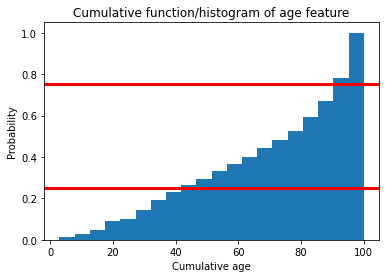

In [9]:
#Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)

plt.hist(boston_pd['AGE'], density='True', cumulative=True, bins=20);
plt.axhline(y=0.25, linewidth=3, color='r')
plt.axhline(y=0.75, linewidth=3, color='r')
plt.xlabel("Cumulative age")
plt.ylabel("Probability")
plt.title("Cumulative function/histogram of age feature")

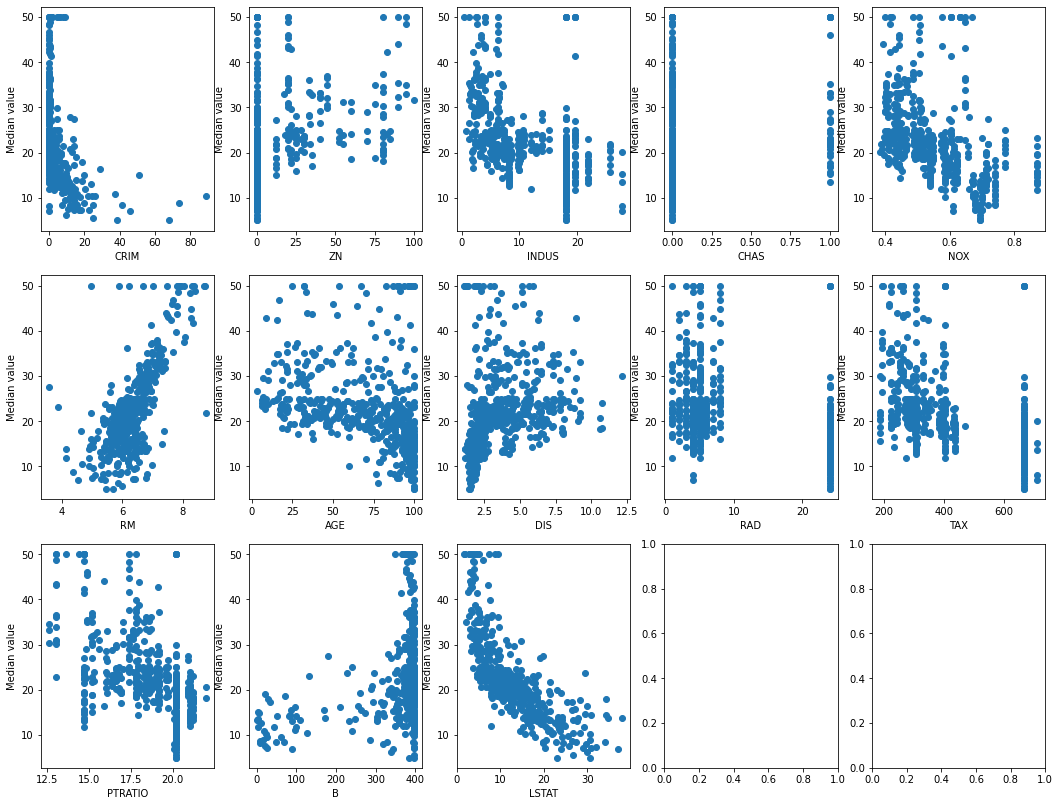

In [10]:
#Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

fig, axes = plt.subplots(3, 5, figsize=(18,14))

for i in range(len(features)):
    if i < 5:
        axes[0,i].scatter(boston_pd[features[i]], boston_pd['MEDV'])
        axes[0,i].set_xlabel(features[i])
        axes[0,i].set_ylabel('Median value')
    elif i < 10: 
        axes[1,i-5].scatter(boston_pd[features[i]], boston_pd['MEDV'])
        axes[1,i-5].set_xlabel(features[i])
        axes[1,i-5].set_ylabel('Median value')
    else:
        axes[2,i-10].scatter(boston_pd[features[i]], boston_pd['MEDV'])
        axes[2,i-10].set_xlabel(features[i])
        axes[2,i-10].set_ylabel('Median value')
        

From the previous plots that display the relationship between each feature and the median value of the owner occupied houses we can identify that:
- Based on AGE: proportion of owner-occupied units built prior to 1940 is most frequent in lower house prices.
- Based on LSTAT: there concentration of lower status people grows as the price of housing decreases.

### Question 2 - Independence and conditional independence

#### 2.A
Can we define a three dimensional multivariate gaussian that is pairwise-independent but not collectivley independent?
If your anser is yes, provide an example.
If your answer is no, provide a proof.

#### 2.A Answer:

No, if a three dimenstional multivariable gaussian is pairwise-independent it must also be collectively independent. We will provide a proof below:

Let $\ X = (X_1, X_2, X_3) $ where for all i=1,2,3 $X_i$ is a gaussian random variable. Let $ \mu = (\mu_1,\mu_2,\mu_3) $, the mean of the 3 dimentional gaussian. 

$ \Sigma \in M^{3x3}(\mathbb{R}) $ is the covaraince matrix. For all i $\neq j\ Cov(X_i,X_j) = 0\ $since there is pairwise idnependence. Thus, $ \Sigma $ is a diagonal matrix. 

The density function for this random variable is
$ P(x_1, x_2, x_3) = \frac{1}{\sqrt((2\pi)^3|\Sigma|)} \exp(-\frac{(X−\mu)^T(\Sigma^{−1})(X−\mu)}{2}) $ 

$ |\Sigma| = det(\Sigma) = \sigma_1^2\sigma_2^2\sigma_3^2 $ 

$X-\mu = (x_1-\mu_1, x_2-\mu_2, x_3-\mu_3) $

So $ (X−\mu)^T(\Sigma^{−1})(X−\mu) = \frac{(x_1-\mu_1)^2}{\sigma_1^2}\frac{(x_2-\mu_2)^2}{\sigma_2^2}\frac{(x_3-\mu_3)^2}{\sigma_3^2} $

This gives us $P(x_1, x_2, x_3) = \frac{1}{\sqrt((2\pi)^3\sigma_1^2\sigma_2^2\sigma_3^2)} \exp(\frac{-(x_1-\mu_1)^2}{2\sigma_1^2}\frac{-(x_2-\mu_2)^2}{2\sigma_2^2}\frac{-(x_3-\mu_3)^2}{2\sigma_3^2}) $

According to exponent rules we can rewrite the above as: 
$P(x_1, x_2, x_3) = \prod_{i=1}^3\frac{1}{\sqrt((2\pi)\sigma_i^2)} \exp(\frac{-(x_i-\mu_i)^2}{2\sigma_i^2}) = \prod_{i=1}^3 P_i(x_i) $ 

for $ P_i(x_i) $ the probability density function of a single gaussian.

So we get that $P(x_1, x_2, x_3) = P_1(x_1)P_2(x_2)P_3(x_3) $ which is exactly the definition of collectively independent $ \blacksquare$



#### 2.B
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

#### 2.B Answer
To define a joint distribution of 3 discrete random variables with no prior knowledge of the distribution we will need $\mathbf{nmk - 1}$ parameters. 

n*m*k is the total number parameters needed to define the joint distribution in the most basic way, that is to provide every 3-D vector $(x,y,z)\ where \ x\in X, y\in Y, z\in Z $
for nmk different vectors. 

But since we know that $ \Sigma_{x\in X, y\in Y, z\in Z} P(x,y,z) = 1$, meaning the n*m*k different vectors are linearly dependent vectors, we actually only need nmk-1 parameters since the last value can be decuded by calculating 1- the rest.

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

#### 2.C Answer
If X,Y,Z are indepedent then P(x,y,z) = P(x)*P(y)*P(z) for all $ x\in X, y\in Y, z\in Z $

For a given random variabel X with n possible outcomes, we will only need n-1 parameters to determine its probability distribution. This is again due to the fact that $\Sigma_{x\in X}$ P(x)= 1 so we only need n-1 independent vectors to define its individual probabilities.

Thus, for X,Y,Z joint distribution we will need $\mathbf{n-1 + m-1 + k-1 = n+m+k - 3}$ parameters to define it. 

#### 2.D
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

#### 2.D Answer
If X and Y are conditionally independent given Z then $P(X\cap Y|Z)=P(X|Z)P(Y|Z)$

So for each vector (x,y,z) where  $ x\in X, y\in Y, z\in Z ,\  P(x,y,z) = P(x,y|z)P(z) 
\stackrel{\text{conditional independence}}{=} P(x|z)P(y|z)P(z) $ 

Due to linear dependence we need k-1 parameters to define the complete Z probability function. Also for each $ z\in Z $ we need to calculate P(x|z) and P(y|z) for all $ x\in X, y\in Y $, thus we will need n-1 + m-1 parameters for each z. We only need n-1 parameters to calculate P(X|z) for all $ x\in X$ given a certain z because once we have P($x_1$|z),..,P($x_{n-1}$|z) then  P($ x_n $|z) is just 1 minus all the previous. All together, this sums to k(n+m-2) + k-1 = $\mathbf{k(n+m-1) -1}$ parameters.

#### 2.E
For the random variables from the previous section, let $n=m=2$ and $k=2$. Give and example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are conditionaly independent given $Z$?

#### 2.E Answer

We have 2 coins, a regular coin where P(H) = 1/2, P(T) = 1/2 and a fake coin when P(H) = 1, P(T) = 0. 

We choose at random one of these 2 coins to toss twice. Let X = event of the first coin toss. Y = event of the second coin toss with the same coin. Z = event of selecting the coin to toss for X and Y.

$ \{H,T\} \in X \\ $
$ \{H,T\} \in Y \\ $
$ \{\text{regular coin selected}, \text{fake coin selected}\} \in Z $

Lets take a look at the following probabilites: <br>

| X/Y value | Given Z  | P(X given Z)   | P(Y given Z)
|---:|:-------|:---|:---|
| H | Regular  | 1/2   | 1/2| 
| T | Regular  | 1/2    | 1/2|
| H | Fake  | 1    | 1|
| T | Fake  | 0    |0|

| Z value | P(Z)| 
|---:|:--|
| Regular | 1/2| 
| Fake | 1/2|

| X value | Y value | Given Z  |  P(X $ \cap$ Y given Z)  |
|---:|:-------|:------|:------------------|
| H | H| Regular  | 1/4| 
| H | T| Regular  | 1/4|
| T | H| Regular  | 1/4|
| T | T| Regular  | 1/4|
| H | H| Fake  | 1|
| H | T| Fake  | 0|
| T | H| Fake  | 0|
| T | T| Fake  | 0|

We will show that X and Y are conditionally independent of Z:

$ P((H,H)|regular) = 1/4 == 1/2*1/2= P(H|regular)P(H|regular) \\
P((H,T)|regular) = 1/4 == 1/2*1/2= P(H|regular)P(T|regular) \\
P((T,H)|regular) = 1/4 == 1/2*1/2= P(T|regular)P(H|regular) \\
P((T,T)|regular) = 1/4 == 1/2*1/2= P(T|regular)P(HTregular) \\
P((H,H)|fake) = 1 == 1*1 = P(H|fake)P(H|fake) \\
P((H,T)|fake) = 0 == 1*0 = P(H|fake)P(T|fake) \\
P((T,H)|fake) = 0 == 0*1 = P(T|fake)P(H|fake) \\
P((T,T)|fake) = 0 == 0*0 = P(T|fake)P(T|fake) $

This satisfies the definition that P(X $ \cap$ Y| Z) = P(X|Z)P(Y|Z).Therefore, X and Y are conditionaly independent of Z.

<!-- However X and Y are not independent:

P(X=H)	=P(X=H|regular)P(regular)+P(X=H|fake)P(fake)
=1/2x1/2+1x1/2
=3/4.
P(X=T) = 1/4

P(Y=H) = 3/4
P(Y=T) = 1/4

$ P((H,H)) = P((H,H)|regular)P(regular) + P((H,H)|fake)P(fake)$
= 1/2^3 + 1*1/2 = 5/8

For independence we expect P(H,H) = P(X=H)P(Y=H)
P(H,H) = 5/8 $ \neq $ 9/16 = 3/4*3/4 = P(X=H)P(Y=H)

Therefore they are not independent. -->

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3\ \ $. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

In [11]:
df = pd.read_csv('GMD_2021.csv',header=None)
df.drop(0, axis=1, inplace=True)
df.columns = ['data']

### Method 1: Running EM algorithm to optimize the GMM parameters to fit the dataset

In [12]:
# Initialize all parameters
mean = np.array([4,9 , 12]).astype(float)
sigma = np.array([0.5,0.5,1.5]) 
weight = np.array([0.65,0.25,0.1]) #Starting with a random guess for w1 and w3
size = df.shape[0]

def log_likelyhood(data_point, mean, sigma, weight):
    result = 0
    for i in range(3):
        result += weight[i] * stats.norm.pdf(data_point,mean[i],sigma[i])
    result = np.log(result)    
    return result


def responsibilities(data_point, mean, sigma, weight):
        #Calculates responsibilities for all distributions in single array
        individual = np.array([(weight[0] * stats.norm.pdf(data_point,mean[0],sigma[0])),(weight[1] * stats.norm.pdf(data_point,mean[1],sigma[1])),(weight[2] * stats.norm.pdf(data_point,mean[2],sigma[2]))])
        summed = 0
        for i in range(3):
            summed +=  weight[i] * stats.norm.pdf(data_point,mean[i],sigma[i])
        respon = individual/summed
        return respon    


def extract_last(data_point):
    last = data_point[-1]
    return last
    

# Algorithm for EM but slightly modified
# Since we are given sigmas, mean1, mean2 parameters as constant we will not change those parameters for the estimation
# We will find the best paramers for mean3, w1, w2, w3 given the rest are already constant
def em(df, mean, sigma, weight, iterations):
    #Beginning log likelihood given estimated paramers
    log_like = df.data.apply(log_likelyhood, mean=mean, sigma=sigma, weight=weight)  # first iteration
    
    df2 = df.copy()
    y= np.zeros(iterations+1)
    y[0] = log_like.sum()
    
    for i in range(iterations):
        df2 = df.data.apply(responsibilities,mean =mean, sigma= sigma, weight =weight)
        
        #Recalculating weights
        weight[0] = df2.sum(axis=0)[0]/size
        weight[1] = df2.sum(axis=0)[1]/size
        #weight[2] = df2.sum(axis=0)[2]/size
        weight[2] = (1 - weight[0] - weight[1])
        
        #Recalculating mean of second gaussian
        last = df2.apply(extract_last)    
        mean[2] = df['data'].dot(last) / (size* weight[2])
                
        log = df.apply(log_likelyhood,mean=mean, weight=weight, sigma=sigma)
        y[i+1] = log.sum()
        
    #Plot log likelihood over iterations to check how many iterations are needed for convergence
    #In this case only 3 iterations until convergence
#     ax = plt.axes()
#     ax.plot([i for i in range(iterations+1)],[item for item in y])
#     plt.xticks(np.arange(0, iterations+1, 1))
#     ax.set(xlabel='Iteration', ylabel='log likelihood',title='Log likelihood over iteration')
        
    return mean, weight

In [13]:
iterations = 5
missing_parameters = em(df, mean, sigma, weight, iterations)

print(f'Estimation of GMM parameters for method 1 (using {iterations} iterations)')
print(f'Gaussian 1: Mean = {round(missing_parameters[0][0],3)}, Weight = {round(missing_parameters[1][0],3)}')
print(f'Gaussian 2: Mean = {round(missing_parameters[0][1],3)}, Weight = {round(missing_parameters[1][1],3)}')
print(f'Gaussian 3: Mean = {round(missing_parameters[0][2],3)}, Weight = {round(missing_parameters[1][2],3)}')

Estimation of GMM parameters for method 1 (using 5 iterations)
Gaussian 1: Mean = 4.0, Weight = 0.125
Gaussian 2: Mean = 9.0, Weight = 0.25
Gaussian 3: Mean = 15.101, Weight = 0.625


### Method 2: Analytically solving for the missing parameters based on GMM equations

In [14]:
mean = np.mean(df)
var = pd.DataFrame.var(df)

We have 3 variables ($\mu_3, w_1, w_3 $) to solve for and 3 independent equations below: 

$\mu = w_1*\mu_1 + w_2*\mu_2 + w_3*\mu_3  \\
V = w_1*v_1 + w_2*v_2 + w_3*v_3 + w_1(\mu_1 - \mu)^2 + w_2(\mu_2 - \mu)^2 + w_3(\mu_3 - \mu)^2  \\
1 = w_1 + w_2 + w_3
$

So we can solve these system of non-linear equations with the fsolve function. It returns the roots of a set of non-linear equations set to 0, given a starting estimate. The parameters we are looking to calculate satisy equations A,B,C below meaning they are presicely the roots of the equations. 

In [15]:
def solver(unknowns):
    
    m = np.mean(df) # mean
    v = pd.DataFrame.var(df)
    m1, m2 = 4,9
    s1, s2, s3 = 0.5, 0.5, 1.5
    v1,v2,v3 = s1**2, s2**2, s3**2  #the given sigmas squared
    w2 = .25
        
    m3 = unknowns[0]
    w1 = unknowns[1]
    w3 = unknowns[2]
    
    A = w1*m1 + w2*m2 + w3*m3 - m
    B = w1*v1 + w2*v2 + w3*v3 + w1*(m1-m)**2 + w2*(m2-m)**2 + w3*(m3-m)**2 - v
    C = w1 + w2 + w3 -1
    
    return np.array([A,B,C], dtype = 'float64')

uks = np.array([15, 0.60, 0.15], dtype = 'float64' )  # guess the starting parameters we are solving for
result = optimize.fsolve(solver, uks)
print('Estimation of GMM parameters using method 2 (Analytical Solution):')
print(f'Mean3: {round(result[0],3)}\nWeight1: {round(result[1],3)}\nWeight3: {round(result[2],3)}')

Estimation of GMM parameters using method 2 (Analytical Solution):
Mean3: 15.089
Weight1: 0.123
Weight3: 0.627


#### Method 3: Running EM algorithm to optimize the GMM parameters to fit the dataset

In [16]:
means_init = np.array([[4], [9], [12]])
precision= np.array([[1/(0.5**2)],[1/(0.5**2)],[1/(1.5**2)]]) 
weights_init = np.array([0.65,0.25,0.1]) #Starting with a random guess for w1 and w3

# we will start with a random estimate for mean and use the model to select a better one
# the fit method of the GaussianMixture Estimates model parameters using the EM algorithm.

gmm = mixture.GaussianMixture(n_components=3,means_init=means_init, weights_init = weights_init, precisions_init=precision, covariance_type='diag').fit(df)

print('Estimation of GMM parameters for method 3:')
print(f'Gaussian 1: Mean = {round(gmm.means_[0][0],3)}, Weight = {round(gmm.weights_[0],3)}')
print(f'Gaussian 2: Mean = {round(gmm.means_[1][0],3)}, Weight = {round(gmm.weights_[1],3)}')
print(f'Gaussian 3: Mean = {round(gmm.means_[2][0],3)}, Weight = {round(gmm.weights_[2],3)}')

Estimation of GMM parameters for method 3:
Gaussian 1: Mean = 4.084, Weight = 0.125
Gaussian 2: Mean = 8.997, Weight = 0.25
Gaussian 3: Mean = 15.102, Weight = 0.625


#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

No handles with labels found to put in legend.


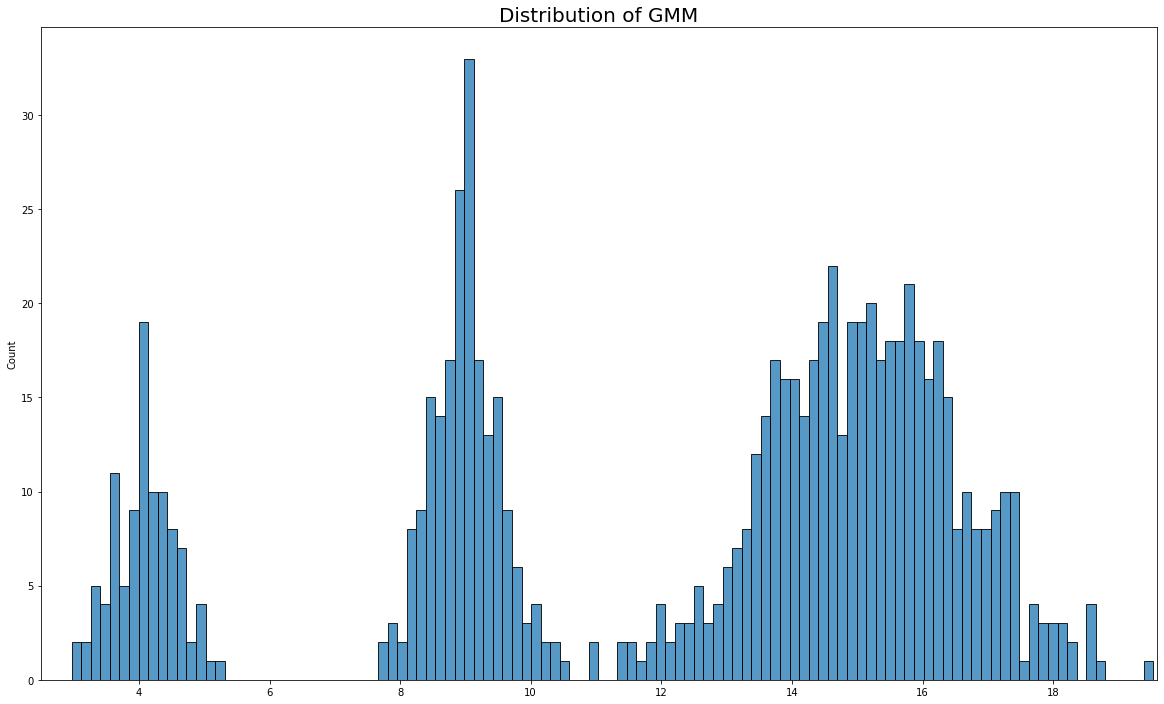

In [17]:
fig, axes = plt.subplots(figsize=(20,12))
plot = sns.histplot(df,bins=120)
sigma_1 = 0.5
sigma_3 = 1.5
mu1 = 4
mu3 = result[0]

plot.set(xlim=(mu1 -3*sigma_1, mu3 + 3*sigma_3))
# set limits so that on left side it gets to mu1 - 3*sd1 of left most gaussian and on right its mu3 + 3*sigma3 of right most gaussian
plot.legend().remove()

plt.title('Distribution of GMM', size = 20)
plt.show()

# Explanation of limits:
# Since we are plotting a dataset that fits to 3 different gaussian, we will set the limits 
# based on the parameters of the left and right most gaussian respectively. 
# 3 standard deviations beyond the mean from the left/right 
# most gaussian will allow us to include 99.7 (3 standard deviations within the mean) + (100-99.7)/2 (inner tail) of each gaussian
# in the plot. This allows us to fit 99.85% of the left and right gaussians and 100% of the middle gaussian in the plot.


#### 3.C
Describe two ways for generating data for a GMD random variable with:
* centers at  $\mu_1+3, \mu_2+5, mu_3+7$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

#### Answer

1. First approach: Since the weights are all equal we can create 3 gaussian distributions independently of each other and then take all the points together with an even amount of points from each. <br><br>
    
2. Second approach: To perform inverse mapping from a gmm. For each individual guassian run inverse mapping for a third of the points then combine all the inverse mapping samples to get a total of 1000.

#### 3.D
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


In [18]:
uks = np.array([15, 0.60, 0.15], dtype = 'float64' )  # guess the starting parameters we are solving for analytically
result = optimize.fsolve(solver, uks)
mean1 = 4
mean2 = 9
mean3 = result[0]

# First approach is a forward approach combining all the guassians directly:
mu1 = mean1 + 3
mu2 = mean2 + 5
mu3 = mean3 + 7 
s1 , s2, s3 = 1,1,1
w1, w2, w3 = 0.33, 0.33, 0.33
size = 1000

Text(0.5, 1.0, 'Method 1: Direct Sampling of 3 combined Gaussian')

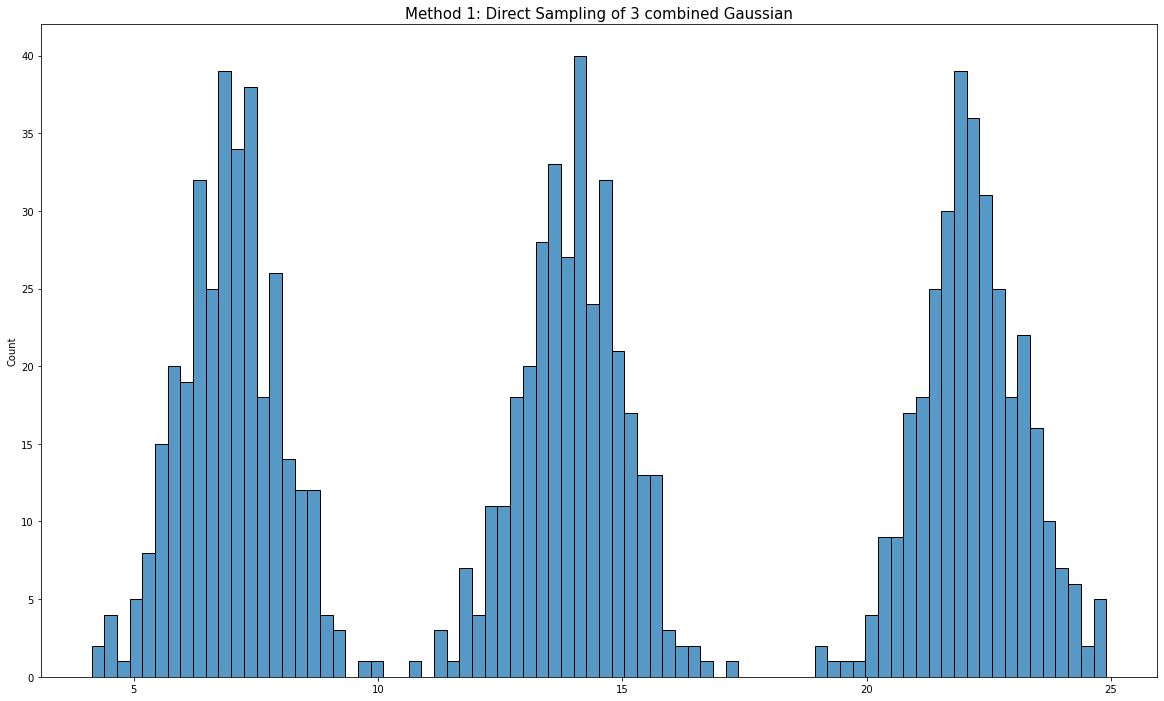

In [19]:
fig, axes = plt.subplots(1, figsize=(20,12))
gauss1 = stats.norm.rvs(loc=mu1, scale=s1, size=size//3)
gauss2 = stats.norm.rvs(loc=mu2, scale=s2, size=size//3)
gauss3 = stats.norm.rvs(loc=mu3, scale=s3, size=size//3 + 1) # added 1 to get to all 1000 points
data = np.append(np.append(gauss1, gauss2), gauss3)
sns.histplot(data, bins=80)
axes.set_title("Method 1: Direct Sampling of 3 combined Gaussian", size = 15)

#### 3.E - BONUS
Use the other one to generate 1000 more points and draw two comparative histograms.


In [20]:
# Inverse sampling for each Gaussian in the mixture and then combining results
size = 1000

# Inverse sampling of Gaussian 1
q=np.random.rand(size//3)
result=stats.norm.ppf(q,loc=mu1,scale=s1)  # Inverse of CDF

# Inverse sampling of Gaussian 2
t=np.random.rand(size//3)
result = np.append(result, stats.norm.ppf(t,loc=mu2,scale=s2) )

# Inverse sampling on Guassian 3
s=np.random.rand(size//3 + 1)
result = np.append(result, stats.norm.ppf(s,loc=mu3,scale=s3) )

Text(0.5, 1.0, 'Inverse Sampling from 3 Gaussians')

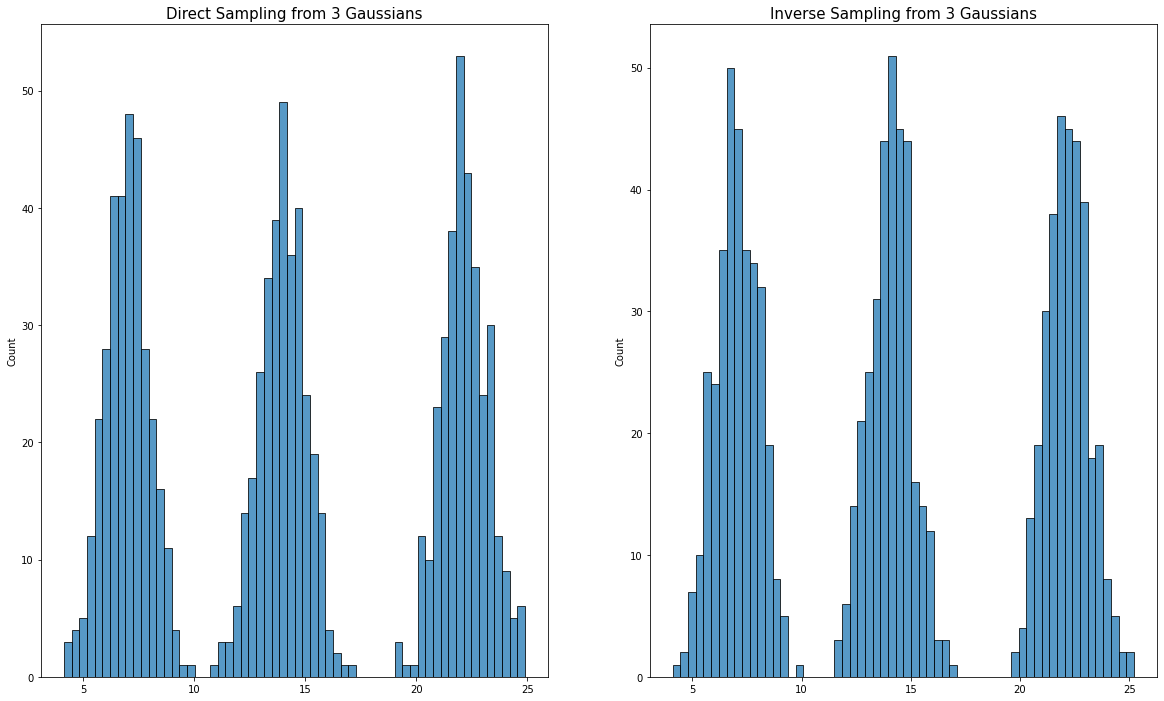

In [21]:
fig, axes = plt.subplots(1,2, figsize=(20,12))
sns.histplot(data, ax=axes[0], bins=60)
axes[0].set_title("Direct Sampling from 3 Gaussians", size = 15)
sns.histplot(result, ax=axes[1], bins=60)
axes[1].set_title("Inverse Sampling from 3 Gaussians", size = 15)

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

In [22]:
mu = 70000
sigma = 30000
salaries_dist = stats.norm(loc=mu, scale=sigma)

#### 4.A
What percent of people earn less than 50,000 RCU?

In [23]:
print( round(salaries_dist.cdf(50000)*100,1),'% of people earn less than 50000 RCU')

25.2 % of people earn less than 50000 RCU


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [24]:
cdf_45 = salaries_dist.cdf(45000)
cdf_65 = salaries_dist.cdf(65000)
print( (round(cdf_65-cdf_45,2)*100), '% of people earn between 45000 and 65000 RCU' )

23.0 % of people earn between 45000 and 65000 RCU


#### 4.C
What percent of people earn more than 70,000 RCU?

In [25]:
cdf_70 = salaries_dist.cdf(70000)
print( (round(1-cdf_70,2)*100), '% of people earn more than 70000 RCU' )

50.0 % of people earn more than 70000 RCU


#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [26]:
employees = 1000
cdf_140 = salaries_dist.cdf(140000)
more_140 = 1-cdf_140
print( round(more_140*100,2),'% of employees are expected to earn more than 140000 RCU')
print( round(more_140*employees,1), 'employees are expected to earn more than 140000 RCU')

0.98 % of employees are expected to earn more than 140000 RCU
9.8 employees are expected to earn more than 140000 RCU


#### 4.E
<span style="color:red"> This question was slightly updated due to a subtlety in the phrasing </span>

A survey is performed on employees of the company. **20 groups of 50 employees each are sampled (with replacenets).**
What is the probability that more than 10 groups have an average salary between 50,000 RCU and 70,000 RCU?

We are sampling randomly from the Randomistan company salaries distribution. Each group has 50 samples and we consider $X_n$ (a random variable) to be the average value of the salaries in the group.

It is important to note that the mean of the salary distribution is non zero and we consider each $X_n$ to be independent from each other. Then, we can apply the central limit theorem and approximate $\bar{X_n}$ as a Normal distribution with mean $\mu$ and variance $\frac{\sigma^2}{n}$ where:
- $\mu$ and $\sigma$ characterize the salaries distribution
- n is the number of groups

Then consider a Binomial process running 20 experiments desiring that more than 10 succeed and using the probability approximated by the central limit theorem.

In [27]:
salary_groups = 20
desired_groups = 10
mu_salary_group = mu
sigma_salary_group = sqrt((sigma**2)/(salary_groups))
avg_salary_group_dist = stats.norm(loc=70000, scale=sigma_salary_group)

avg_salary_probability = avg_salary_group_dist.cdf(70000) - avg_salary_group_dist.cdf(50000)

#prob of 10 or less groups
group_prob_avg_salary = stats.binom.cdf(desired_groups, salary_groups, avg_salary_probability)

#prob of more than 10 groups
1-group_prob_avg_salary

0.40685355851395844

### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

$X_i$ is the time (or number of coupons) to collect coupon $i$ ($i-1$ coupons have already been collected).
$p_i$ is the probability of collecting coupon i. 

$ p_i = \frac{N-(i-1)}{N} $

$X_i$ is geometrically distributed, then $E(X_i) = \frac{1}{p_i}$ and $Var(X_i) = \frac{1-p_i}{p_i^2}$


#### 5.A
Write code to compute the exact value of $E(T_{N})$

$E(T) = E(X_1+X_2+...+X_N) = $ 

By linearity of expectations:

$E(T) = E(X_1) + E(X_2) + ... + E(X_N) =$

Describing coupong collector as geometric distribution:

$E(T) = \frac{1}{p_1} + \frac{1}{p_2} + ... + \frac{1}{p_N} = $

$ = N * (\frac{1}{n} + \frac{1}{n-1} + \frac{1}{n-1} + ... + \frac{1}{1} )=$

$ = \sum_{i=1}^{N} N·\frac{1}{i} = N·Harm_N$

In [2]:
def expected_Tn(N):
    HN = 1
    for i in range(2,N+1):
        HN = HN + 1/i
    return N*HN

#### 5.B
Write code to compute the exact value of $V(T_{N})$

$ Var(T_N) = Var(X_1+X_2+...+X_N) $

As each collection is independent from the other:

$ Var(T_N) = Var(X_1) + Var(X_2) + ... + Var(X_N) =$

$ = \frac{1-p_1}{p_1^2} + \frac{1-p_2}{p_2^2} + ... + \frac{1-p_N}{p_N^2} = \sum_{i=1}^{N} \frac{1-p_i}{p_i^2}$

In [3]:
def variance_Tn(N):
    var = 0
    for i in range(1,N+1):
        pi = (N-(i-1))/N
        var = var + ( (1-pi)/(pi**2) )
    return var

#### 5.C
Write code to exactly compute $P(T_{20}>40)$

$P(T_{20} > 40) = 1 - P(T_{20} <= 40) = 1 - [P(T_{20}=20) + P(T_{20}=21) + P(T_{20}=22) + ... + P(T_{20}=40)]$

We can compute each of the probabilities using convolution:

$ P(T_{20} = k) = \sum_{i=1}^{k-1}  [P(G_N = i)·P(T_{N-1} =  k-i)] $

In [4]:
#This will be a recursive function as the stated convolution requires a previous state convolution
def tn_eq_k(total_coupons, collections_list, collected_coupons):
    
    #first trial
    if collected_coupons == 0:
        return stats.geom.pmf(collections_list, (total_coupons - collected_coupons )/total_coupons )
    
    #convolve recursively
    res = np.convolve( stats.geom.pmf(collections_list, (total_coupons - collected_coupons)/total_coupons )
                      , tn_eq_k(total_coupons, collections_list, collected_coupons-1) 
                      , 'full')
    return res
    
total_coupons = 20
collection_tries = 40
collections_list = np.arange(collection_tries) +1
#Start with final step of only one coupon left to collect and recursively calculate the initial conditions for each coupon to collect.
result = tn_eq_k(total_coupons, collections_list, total_coupons-1)

#Add the calculated value for all possible amount of successes (collectingin k=20, k=21, ..., k=40, k in [20,40]). 
#For k<20 trials, it is not possible to collect 20 coupons.
prob_20_to_40 = result[0:collection_tries+1-total_coupons].sum()

#P(T_20 > 40) = 1 - P(T_20 <= 40)
print( round(1-prob_20_to_40, 3) ) 

0.964


#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

Chebyshev theorem is as follows: $ P( |X - \mu|> k\sigma ) < \frac{1}{k^2} $.

We can estimate a bound using this formula and the written functions. p is the probability of having to collect at least 40 coupons.

In [5]:
mu = expected_Tn(20)
sigma = sqrt(variance_Tn(20)) 
X = collection_tries
k = abs(X-mu)/sigma

#Need P T_20 > 40 and not < 40
p = 1 - 1/(k**2)
print( 'Chebyshev probability bound:', round(p,3) )


Chebyshev probability bound: 0.445


In [7]:
mu

71.95479314287364

Chebyshev inequality provides a bound that is less tight that the one calculated in 5.C. There is a great difference in its values, even in this case, the bound calculated with Chebyshev is not relevantly significant and will only give us an idea on the result we are looking for. 
When calculating directly, we found that it is 0.964 probable that we need more than 40 trials to collect the 40 coupons. With Chebyshev, we only approximate to this by knowing that there is ***at least*** 0.445 probability of needing more than 40 collection trials.

In [32]:
mu, X

(71.95479314287364, 40)

In [ ]:
sum = 0
for i in range(0,16):
    